In [1]:
def mnist2LayersTest(Units,Epochs,Layers):

    from keras.utils import to_categorical
    from keras.datasets import mnist
    from keras import models
    from keras import layers
    import numpy as np

    #(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    f = np.load("/home/chen/.keras/datasets/mnist.npz")
    train_images, train_labels = f['x_train'], f['y_train']
    test_images, test_labels = f['x_test'], f['y_test']
    f.close()

    #making the neural network>>>
    network = models.Sequential()
    network.add(layers.Dense(Units, activation='relu', input_shape=(28 * 28,)))
    for i in range(Layers):
        network.add(layers.Dense(Units, activation='relu'))
    network.add(layers.Dense(10, activation='softmax'))

    network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    #making the neural network<<<

    #resize the inputs>>>
    train_images = train_images.reshape((60000, 28 * 28))
    train_images = train_images.astype('float32') / 255
    test_images = test_images.reshape((10000, 28 * 28))
    test_images = test_images.astype('float32') / 255
    #add labels
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)
    #resize the inputs<<<

    #training>>>
    network.fit(train_images, train_labels, epochs=Epochs, batch_size=128)
    #training<<<

    #testing>>>
    test_loss, test_acc = network.evaluate(test_images, test_labels)
    #testing<<<

    return test_loss, test_acc

In [2]:
#epochs find the peak
import matplotlib.pyplot as plt
losslist=[]
acclist=[]
for i in range(11):
    loss, acc = mnist2LayersTest(2048,i,0)
    acclist.append(acc)
    losslist.append(loss)

print(acclist)
print(losslist)

Using TensorFlow backend.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

10000/10000 [==============================] - 1s 101us/step
Epoch 1/1
10000/10000 [==============================] - 1s 64us/step
Epoch 1/2
60000/60000 [==============================] - 2s 31us/step - loss: 0.2149 - accuracy: 0.9347
Epoch 2/2
10000/10000 [==============================] - 1s 57us/step
Epoch 1/3
60000/60000 [==============================] - 2s 31us/step - loss: 0.2156 - accuracy: 0.9355
Epoch 2/3
60000/60000 [==============================] - 2s 31us/step - loss: 0.0789 - accuracy: 0.9760
Epoch 3/3
10000/10000 [==============================] - 1s 62us/step
Epoch 1/4
60000/60000 [==============================] - 2s 31us/step - loss: 0.2162 - accuracy: 0.9358
Epoch 2/4
60000/60000 [==============================] - 2s 31us/step - loss: 0.0792 - accuracy: 0.9760
Epoch 3/4
60000/60000 [==============================] - 2s 31us/step - loss: 0.0510 - accuracy: 0.98

Epoch 1/3
60000/60000 [==============================] - 3s 56us/step - loss: 2.0320 - accuracy: 0.1987
Epoch 2/3
60000/60000 [==============================] - 3s 48us/step - loss: 1.8931 - accuracy: 0.2202
Epoch 3/3
10000/10000 [==============================] - 2s 180us/step
Epoch 1/3
60000/60000 [==============================] - 3s 57us/step - loss: 1.8464 - accuracy: 0.2987
Epoch 2/3
60000/60000 [==============================] - 3s 48us/step - loss: 1.5583 - accuracy: 0.3781
Epoch 3/3
10000/10000 [==============================] - 2s 186us/step
Epoch 1/3
60000/60000 [==============================] - 3s 58us/step - loss: 1.3094 - accuracy: 0.5397
Epoch 2/3
60000/60000 [==============================] - 3s 49us/step - loss: 0.8063 - accuracy: 0.7521
Epoch 3/3
10000/10000 [==============================] - 2s 185us/step
Epoch 1/3
60000/60000 [==============================] - 3s 58us/step - loss: 0.8946 - accuracy: 0.7439
Epoch 2/3
60000/60000 [==============================] - 3s

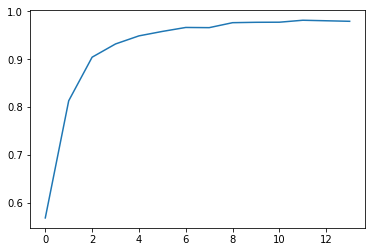

[0.2240999937057495, 0.5679000020027161, 0.8130000233650208, 0.90420001745224, 0.9319000244140625, 0.9488000273704529, 0.9581000208854675, 0.9664000272750854, 0.9660000205039978, 0.9764000177383423, 0.9771999716758728, 0.977400004863739, 0.9815000295639038, 0.980400025844574, 0.9793000221252441]


In [45]:
#Units find the peak
import matplotlib.pyplot as plt

acclist=[]
for i in range(15):
    acclist.append(mnist2LayersTest(2**i,3,0))

plt.plot(acclist[1:])
plt.show()

print(acclist)

Epoch 1/3
60000/60000 [==============================] - 4s 62us/step - loss: 0.3265 - accuracy: 0.9101
Epoch 2/3
60000/60000 [==============================] - 3s 50us/step - loss: 0.1538 - accuracy: 0.9559
Epoch 3/3
10000/10000 [==============================] - 2s 196us/step
Epoch 1/3
60000/60000 [==============================] - 4s 66us/step - loss: 0.3060 - accuracy: 0.9124
Epoch 2/3
60000/60000 [==============================] - 3s 56us/step - loss: 0.1286 - accuracy: 0.9614
Epoch 3/3
10000/10000 [==============================] - 2s 198us/step
Epoch 1/3
60000/60000 [==============================] - 4s 70us/step - loss: 0.2977 - accuracy: 0.9111
Epoch 2/3
60000/60000 [==============================] - 4s 60us/step - loss: 0.1165 - accuracy: 0.9649
Epoch 3/3
10000/10000 [==============================] - 2s 199us/step
Epoch 1/3
60000/60000 [==============================] - 5s 75us/step - loss: 0.2950 - accuracy: 0.9101
Epoch 2/3
60000/60000 [==============================] - 4s

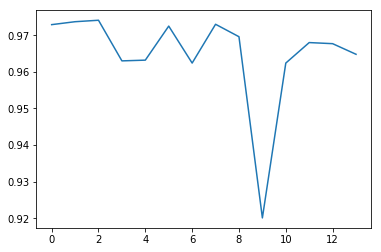

[0.9688000082969666, 0.9728999733924866, 0.9736999869346619, 0.9740999937057495, 0.9629999995231628, 0.9631999731063843, 0.9725000262260437, 0.9624000191688538, 0.9729999899864197, 0.9696000218391418, 0.9200999736785889, 0.9624000191688538, 0.9679999947547913, 0.9677000045776367, 0.9648000001907349]


In [46]:
#Layers find the peak
import matplotlib.pyplot as plt

acclist=[]
for i in range(15):
    acclist.append(mnist2LayersTest(128,3,i))

plt.plot(acclist[1:])
plt.show()

print(acclist)